In [3]:
import pandas as pd
import numpy as np
from stockstats import wrap
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder
from geopy import distance
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from catboost import CatBoostRegressor

/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:
data = pd.read_csv('data/Bitcoin.csv')
y = data['Close']
data = data.drop(['Currency', 'Close'], axis=1)
df = wrap(data)

In [6]:
df.tail(20)

,open,high,low,volume
date,,,,
2022-08-04,22822.2,23214.5,22438.7,181186
2022-08-05,22613.3,23447.6,22593.5,208903
2022-08-06,23308.2,23344.4,22923.6,94439
2022-08-07,22944.2,23387.7,22852.3,99357
2022-08-08,23175.3,24234.1,23160.6,197942
2022-08-09,23818.1,23912.0,22886.5,169621
2022-08-10,23150.3,24209.9,22714.7,243610
2022-08-11,23963.3,24873.5,23864.0,285357
2022-08-12,23935.3,24440.8,23616.4,194961


In [7]:
#'open_2_sma', 'open_5_sma', 'open_10_sma', 'open_20_sma', 'open_50_sma', 'open_100_sma', 'open_2_ema', 'open_5_ema', 'open_10_ema', 'open_20_ema','open_50_ema', 'open_100_ema', 'open_5_mvar', 'open_20_mvar', 'open_50_mvar', 'open_100_mvar', 'open_5_mstd', 'open_20_mstd', 'open_50_mstd', 'open_100_mstd',

In [8]:
X = df[[
'high_2_sma', 'high_5_sma', 'high_10_sma', 'high_20_sma', 'high_50_sma', 'high_100_sma', 'high_2_ema', 'high_5_ema', 'high_10_ema', 'high_20_ema','high_50_ema', 'high_100_ema', 'high_5_mvar', 'high_20_mvar', 'high_50_mvar', 'high_100_mvar', 'high_5_mstd', 'high_20_mstd', 'high_50_mstd', 'high_100_mstd',
'low_2_sma', 'low_5_sma', 'low_10_sma', 'low_20_sma', 'low_50_sma', 'low_100_sma', 'low_2_ema', 'low_5_ema', 'low_10_ema', 'low_20_ema','low_50_ema', 'low_100_ema', 'low_5_mvar', 'low_20_mvar', 'low_50_mvar', 'low_100_mvar', 'low_5_mstd', 'low_20_mstd', 'low_50_mstd', 'low_100_mstd',
'volume_2_sma', 'volume_5_sma', 'volume_10_sma', 'volume_20_sma', 'volume_50_sma', 'volume_100_sma', 'volume_2_ema', 'volume_5_ema', 'volume_10_ema', 'volume_20_ema','volume_50_ema', 'volume_100_ema', 'volume_5_mvar', 'volume_20_mvar', 'volume_50_mvar', 'volume_100_mvar', 'volume_5_mstd', 'volume_20_mstd', 'volume_50_mstd', 'volume_100_mstd'
]]

In [9]:
X.to_csv('whathappened2.csv')

In [10]:
z = X.pct_change()

In [11]:
z

,high_2_sma,high_5_sma,high_10_sma,high_20_sma,high_50_sma,high_100_sma,high_2_ema,high_5_ema,high_10_ema,high_20_ema,...,volume_50_ema,volume_100_ema,volume_5_mvar,volume_20_mvar,volume_50_mvar,volume_100_mvar,volume_5_mstd,volume_20_mstd,volume_50_mstd,volume_100_mstd
date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,3.393200,3.359933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.000000,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,0.000000,0.000000,0.000000,0.000000,...,-0.071026,-0.067584,-0.489542,-0.489542,-0.489542,-0.489542,-0.285536,-0.285536,-0.285536,-0.285536
2010-07-21,0.000000,-1.110223e-16,-1.110223e-16,-1.110223e-16,-1.110223e-16,-1.110223e-16,0.000000,0.000000,0.000000,0.000000,...,0.232987,0.228161,-0.043722,-0.043722,-0.043722,-0.043722,-0.022106,-0.022106,-0.022106,-0.022106
2010-07-22,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.021721,0.992183,10.276705,10.276705,10.276705,10.276705,2.358081,2.358081,2.358081,2.358081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19,-0.025441,-1.465961e-02,-2.899523e-03,-2.912549e-03,2.680008e-03,-3.539692e-03,-0.018694,-0.014260,-0.008128,-0.003293,...,-0.037816,-0.019704,1.071637,0.469806,0.082222,0.022507,0.439318,0.212355,0.040299,0.011191
2022-08-20,-0.047469,-3.189632e-02,-1.168795e-02,-5.875217e-03,5.015530e-04,-3.499648e-03,-0.058854,-0.035382,-0.020628,-0.010324,...,-0.038329,-0.019741,-0.046713,-0.047526,-0.005552,-0.033923,-0.023636,-0.024052,-0.002780,-0.017108
2022-08-21,-0.033885,-2.181812e-02,-1.318852e-02,-3.753007e-03,1.987497e-03,-3.724352e-03,-0.010715,-0.019608,-0.014652,-0.008093,...,-0.038425,-0.019748,0.100305,-0.013505,-0.070620,0.000883,0.048954,-0.006776,-0.035957,0.000442


In [12]:
y = pd.DataFrame(y)
y_change = y.pct_change()

In [13]:
y_change

,Close
0,NaN
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4415,-0.102238
4416,0.014766
4417,0.017896
4418,-0.004689


In [14]:
z = z.reset_index()

In [15]:
df = z.join(y_change)

In [16]:
df.to_csv('whathappened.csv')

In [17]:
df = df.iloc[: , 1:]

In [18]:
newest_date = df.iloc[-1:].copy()
newest_date = newest_date.fillna(0)
df.drop(df.tail(1).index,inplace=True)

In [19]:
newest_date

,high_2_sma,high_5_sma,high_10_sma,high_20_sma,high_50_sma,high_100_sma,high_2_ema,high_5_ema,high_10_ema,high_20_ema,...,volume_100_ema,volume_5_mvar,volume_20_mvar,volume_50_mvar,volume_100_mvar,volume_5_mstd,volume_20_mstd,volume_50_mstd,volume_100_mstd,Close
4419,-0.00542,-0.019038,-0.014567,-0.004571,0.001008,-0.003999,-0.004839,-0.011669,-0.011695,-0.007621,...,-0.019723,-0.266628,0.019892,-0.038967,0.002274,-0.143629,0.009897,-0.019677,0.001137,-0.00501


In [20]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [21]:
df

,high_2_sma,high_5_sma,high_10_sma,high_20_sma,high_50_sma,high_100_sma,high_2_ema,high_5_ema,high_10_ema,high_20_ema,...,volume_100_ema,volume_5_mvar,volume_20_mvar,volume_50_mvar,volume_100_mvar,volume_5_mstd,volume_20_mstd,volume_50_mstd,volume_100_mstd,Close
102,0.000000,0.111111,0.071429,0.041667,0.018182,0.009524,0.004141,0.036530,0.052498,0.047849,...,0.000654,-0.234689,-0.252165,-0.008432,-0.002566,-0.125179,-0.135226,-0.004225,-0.001284,0.000000
109,0.000000,0.000000,0.000000,0.031250,0.016129,0.008850,-0.166666,-0.046196,-0.006304,0.012783,...,0.007520,-0.010934,0.000861,-0.010237,-0.000126,-0.005482,0.000431,-0.005132,-0.000063,0.000000
110,0.000000,0.090909,0.047619,0.060606,0.031746,0.017544,0.233334,0.118233,0.083123,0.064749,...,0.014156,-0.030406,-0.068042,-0.012347,0.003513,-0.015320,-0.034620,-0.006193,0.001755,0.500000
111,0.600000,0.250000,0.136364,0.114286,0.061538,0.034483,0.549550,0.339702,0.225863,0.155193,...,0.009839,-0.069740,-0.018369,-0.008166,0.002390,-0.035500,-0.009227,-0.004092,0.001194,0.333333
112,0.250000,0.200000,0.120000,0.102564,0.057971,0.033333,0.118217,0.169044,0.150748,0.121549,...,0.052417,0.101643,0.434180,0.035657,0.051025,0.049592,0.197572,0.017672,0.025195,-0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,-0.013620,-0.010545,-0.002673,-0.001579,0.002789,-0.003579,-0.024016,-0.013456,-0.006454,-0.001990,...,-0.019756,0.108754,-0.009049,-0.028631,-0.010756,0.052974,-0.004535,-0.014420,-0.005393,-0.005759
4415,-0.025441,-0.014660,-0.002900,-0.002913,0.002680,-0.003540,-0.018694,-0.014260,-0.008128,-0.003293,...,-0.019704,1.071637,0.469806,0.082222,0.022507,0.439318,0.212355,0.040299,0.011191,-0.102238
4416,-0.047469,-0.031896,-0.011688,-0.005875,0.000502,-0.003500,-0.058854,-0.035382,-0.020628,-0.010324,...,-0.019741,-0.046713,-0.047526,-0.005552,-0.033923,-0.023636,-0.024052,-0.002780,-0.017108,0.014766
4417,-0.033885,-0.021818,-0.013189,-0.003753,0.001987,-0.003724,-0.010715,-0.019608,-0.014652,-0.008093,...,-0.019748,0.100305,-0.013505,-0.070620,0.000883,0.048954,-0.006776,-0.035957,0.000442,0.017896


In [22]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=35)

In [23]:
train_set = train_set.dropna()
test_set = test_set.dropna()

In [24]:
X_train = np.asarray(train_set.drop('Close', axis=1))
y_train = np.asarray(train_set['Close'].copy())
y_train = y_train.reshape(-1,1)

In [25]:
X_test = np.asarray(test_set.drop('Close', axis=1))
y_test = np.asarray(test_set['Close'].copy())
y_test = y_test.reshape(-1,1)

In [26]:
scalerX_train = StandardScaler().fit(X_train)
#scalery = MinMaxScaler().fit(y_train)
X_train = scalerX_train.transform(X_train)
#y_train = scalery.transform(y_train)

In [27]:
#scalerX_test = MinMaxScaler().fit(X_test)
#scalery = MinMaxScaler().fit(y_train)
X_test = scalerX_train.transform(X_test)
#y_train = scalery.transform(y_train)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=35)

In [29]:
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [72]:
def make_df(y_pred,y_test):
    y_test = pd.Series(y_test.ravel())
    y_pred = pd.Series(y_pred)
    
    y_pred.name = 'y_pred'
    y_test.name = 'y_test'
    
    df = pd.concat([y_pred,y_test],axis=1)

    df['sign_pred'] = df.y_pred.apply(np.sign)
    df['sign_true'] = df.y_test.apply(np.sign)
    df['is_correct'] = 0
    df.loc[df.sign_pred * df.sign_true > 0 ,'is_correct'] = 1 # only registers 1 when prediction was made AND it was correct
    df['is_incorrect'] = 0
    df.loc[df.sign_pred * df.sign_true < 0,'is_incorrect'] = 1 # only registers 1 when prediction was made AND it was wrong
    df['is_predicted'] = df.is_correct + df.is_incorrect
    df['result'] = df.sign_pred * df.y_test
    df['residual'] = np.abs(y_test - y_pred)
    return df

In [31]:
run_experiment(rf)

/var/folders/ct/ty10q4_566jcj84rbd47bm7w0000gn/T/ipykernel_32646/3975955838.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


R^2 :  0.6028447829239229
MAE : 0.019064026449249313
RMSE: 0.03492625159836414


In [32]:
y_pred = rf.predict(X_test)

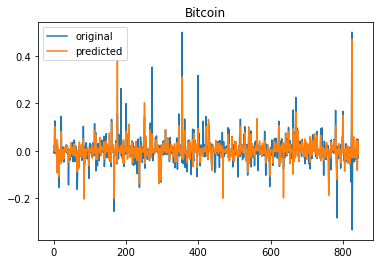

In [33]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Bitcoin")
plt.legend()
plt.show()

In [71]:
y_pred = rf.predict(X_test)
df = make_df(y_pred,y_test)
print(df.dropna().tail())
df.is_correct.sum()

       y_pred    y_test  sign_pred  sign_true  is_correct  is_incorrect  \
837  0.042195  0.048628        1.0        1.0           1             0   
838 -0.000346  0.019637       -1.0        1.0           0             1   
839 -0.081754 -0.079809       -1.0       -1.0           1             0   
840  0.042667  0.049711        1.0        1.0           1             0   
841 -0.014570 -0.029993       -1.0       -1.0           1             0   

     is_predicted    result    change  
837             1  0.048628  0.006432  
838             1 -0.019637  0.019983  
839             1  0.079809  0.001945  
840             1  0.049711  0.007044  
841             1  0.029993  0.015423  


598

In [35]:
print(rf.predict(newest_date.iloc[:, :-1]))

[-0.02635997]


/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [36]:
from sklearn import linear_model
clf = linear_model.LassoCV(max_iter=10000)
#clf.fit(X_train, y_train)

#print(clf.coef_)
#print(clf.intercept_)

In [37]:
#print(clf.predict(newest_date.iloc[:, :-1]))

In [38]:
run_experiment(clf)

/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 :  0.5189211152567529
MAE : 0.02252569763221338
RMSE: 0.03843970003876844


In [39]:
print(clf.predict(newest_date.iloc[:, :-1]))

[0.00666813]


/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [40]:
y_pred = clf.predict(X_test)
df = make_df(y_pred,y_test)
print(df.dropna().tail())
df.change.sum()

       y_pred    y_test  sign_pred  sign_true  is_correct  is_incorrect  \
837  0.036395  0.048628        1.0        1.0           1             0   
838  0.002868  0.019637        1.0        1.0           1             0   
839 -0.062301 -0.079809       -1.0       -1.0           1             0   
840  0.008061  0.049711        1.0        1.0           1             0   
841 -0.010275 -0.029993       -1.0       -1.0           1             0   

     is_predicted    result    change  
837             1  0.048628  0.012232  
838             1  0.019637  0.016769  
839             1  0.079809  0.017508  
840             1  0.049711  0.041650  
841             1  0.029993  0.019718  


18.966637406323667

In [41]:
from sklearn.svm import SVR
svcd = SVR(C=1.0, epsilon=0.2)
#svcd.fit(X_train, y_train)

In [42]:
run_experiment(svcd)
y_pred = svcd.predict(X_test)

R^2 :  -1.1294009383228576
MAE : 0.06743030130552263
RMSE: 0.08087244306022381


/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
y_pred = svcd.predict(X_test)
df = make_df(y_pred,y_test)
print(df.dropna().tail())
df.change.sum()

       y_pred    y_test  sign_pred  sign_true  is_correct  is_incorrect  \
837 -0.062507  0.048628       -1.0        1.0           0             1   
838 -0.016613  0.019637       -1.0        1.0           0             1   
839 -0.015487 -0.079809       -1.0       -1.0           1             0   
840 -0.068465  0.049711       -1.0        1.0           0             1   
841 -0.013593 -0.029993       -1.0       -1.0           1             0   

     is_predicted    result    change  
837             1 -0.048628  0.111135  
838             1 -0.019637  0.036250  
839             1  0.079809  0.064323  
840             1 -0.049711  0.118176  
841             1  0.029993  0.016400  


56.77631369925006

In [44]:
print(svcd.predict(newest_date.iloc[:, :-1]))

[-0.09478489]


/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [45]:
y_pred = clf.predict(X_test)

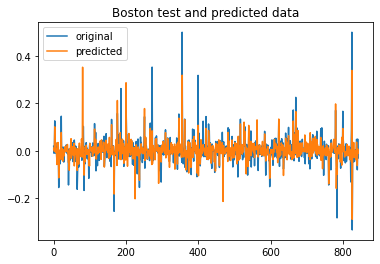

In [46]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [77]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=10000)

In [78]:
run_experiment(reg)

R^2 :  -2584269846428419.5
MAE : 2736749.286928032
RMSE: 2817349.802447472


/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
y_pred = reg.predict(X_test)
df = make_df(y_pred,y_test)
print(df.dropna().tail())
df.change.sum()

           y_pred    y_test  sign_pred  sign_true  is_correct  is_incorrect  \
837  3.523554e+06  0.048628        1.0        1.0           1             0   
838  3.162422e+06  0.019637        1.0        1.0           1             0   
839  4.110184e+06 -0.079809        1.0       -1.0           0             1   
840  2.384513e+06  0.049711        1.0        1.0           1             0   
841  3.997826e+06 -0.029993        1.0       -1.0           0             1   

     is_predicted    result      residual  
837             1  0.048628  3.523554e+06  
838             1  0.019637  3.162422e+06  
839             1 -0.079809  4.110184e+06  
840             1  0.049711  2.384513e+06  
841             1 -0.029993  3.997826e+06  


AttributeError: 'DataFrame' object has no attribute 'change'

In [80]:
print(reg.predict(newest_date.iloc[:, :-1]))

[-5045543.41584482]


/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


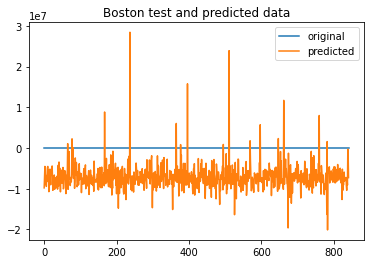

In [51]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
run_experiment(gbr)

/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 :  0.5782964304735231
MAE : 0.020431829548298128
RMSE: 0.0359894724689451


In [53]:
y_pred = gbr.predict(X_test)
df = make_df(y_pred,y_test)
print(df.dropna().tail())
df.change.sum()

       y_pred    y_test  sign_pred  sign_true  is_correct  is_incorrect  \
837  0.034028  0.048628        1.0        1.0           1             0   
838 -0.000372  0.019637       -1.0        1.0           0             1   
839 -0.082269 -0.079809       -1.0       -1.0           1             0   
840  0.015755  0.049711        1.0        1.0           1             0   
841 -0.000837 -0.029993       -1.0       -1.0           1             0   

     is_predicted    result    change  
837             1  0.048628  0.014600  
838             1 -0.019637  0.020008  
839             1  0.079809  0.002460  
840             1  0.049711  0.033956  
841             1  0.029993  0.029156  


17.203600479667024

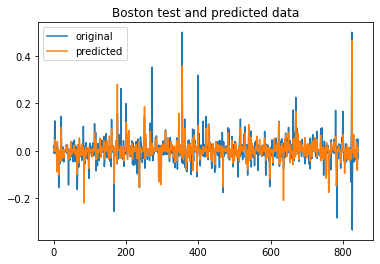

In [54]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [55]:
print(gbr.predict(newest_date.iloc[:, :-1]))

[-0.08568904]


/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [56]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
run_experiment(br)

R^2 :  0.4883290888010866
MAE : 0.022961287821649277
RMSE: 0.03964306332142326


/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
y_pred = br.predict(X_test)
df = make_df(y_pred,y_test)
print(df.dropna().tail())
df.change.sum()

       y_pred    y_test  sign_pred  sign_true  is_correct  is_incorrect  \
837  0.032697  0.048628        1.0        1.0           1             0   
838  0.001777  0.019637        1.0        1.0           1             0   
839 -0.066343 -0.079809       -1.0       -1.0           1             0   
840  0.012213  0.049711        1.0        1.0           1             0   
841 -0.005315 -0.029993       -1.0       -1.0           1             0   

     is_predicted    result    change  
837             1  0.048628  0.015931  
838             1  0.019637  0.017860  
839             1  0.079809  0.013466  
840             1  0.049711  0.037498  
841             1  0.029993  0.024678  


19.33340434582869

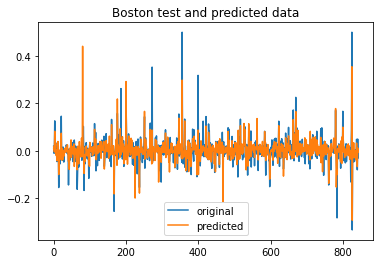

In [58]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [59]:
print(br.predict(newest_date.iloc[:, :-1]))

[-0.00087422]


/Users/xiyan/.conda/envs/pythonPKG/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(


In [60]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=50, eta=0.1, subsample=0.7, colsample_bytree=0.8)
run_experiment(xgb)

R^2 :  0.4955399208928163
MAE : 0.02064046098653069
RMSE: 0.03936273297561065


In [69]:
y_pred = xgb.predict(X_test)
df = make_df(y_pred,y_test)
print(df.dropna().tail())
df.change.sum()

       y_pred    y_test  sign_pred  sign_true  is_correct  is_incorrect  \
837  0.048588  0.048628        1.0        1.0           1             0   
838  0.006167  0.019637        1.0        1.0           1             0   
839 -0.102683 -0.079809       -1.0       -1.0           1             0   
840  0.024876  0.049711        1.0        1.0           1             0   
841  0.002925 -0.029993        1.0       -1.0           0             1   

     is_predicted    result    change  
837             1  0.048628  0.000040  
838             1  0.019637  0.013469  
839             1  0.079809  0.022874  
840             1  0.049711  0.024835  
841             1 -0.029993  0.032918  


17.37926815065884

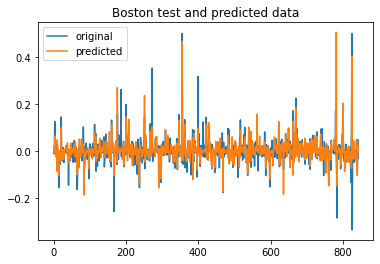

In [62]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [63]:
print(xgb.predict(newest_date.iloc[:, :-1]))

[-0.04726394]


In [64]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor()
run_experiment(cbr)

Learning rate set to 0.049598
0:	learn: 0.0842296	total: 60.6ms	remaining: 1m
1:	learn: 0.0835127	total: 63.7ms	remaining: 31.8s
2:	learn: 0.0827685	total: 66.3ms	remaining: 22s
3:	learn: 0.0820551	total: 69ms	remaining: 17.2s
4:	learn: 0.0813976	total: 71.5ms	remaining: 14.2s
5:	learn: 0.0807124	total: 74.6ms	remaining: 12.4s
6:	learn: 0.0800651	total: 77.7ms	remaining: 11s
7:	learn: 0.0793880	total: 80.9ms	remaining: 10s
8:	learn: 0.0787881	total: 83.7ms	remaining: 9.22s
9:	learn: 0.0781225	total: 86.4ms	remaining: 8.55s
10:	learn: 0.0775383	total: 88.8ms	remaining: 7.99s
11:	learn: 0.0769077	total: 91.4ms	remaining: 7.52s
12:	learn: 0.0763087	total: 93.8ms	remaining: 7.12s
13:	learn: 0.0757316	total: 96.7ms	remaining: 6.81s
14:	learn: 0.0751945	total: 99.7ms	remaining: 6.55s
15:	learn: 0.0746026	total: 103ms	remaining: 6.32s
16:	learn: 0.0740532	total: 106ms	remaining: 6.12s
17:	learn: 0.0730881	total: 109ms	remaining: 5.93s
18:	learn: 0.0725814	total: 112ms	remaining: 5.77s
19:	lea

In [68]:
y_pred = cbr.predict(X_test)
df = make_df(y_pred,y_test)
print(df.dropna().tail())
df.is_correct.sum()

       y_pred    y_test  sign_pred  sign_true  is_correct  is_incorrect  \
837  0.029815  0.048628        1.0        1.0           1             0   
838 -0.002493  0.019637       -1.0        1.0           0             1   
839 -0.082299 -0.079809       -1.0       -1.0           1             0   
840  0.036802  0.049711        1.0        1.0           1             0   
841 -0.005844 -0.029993       -1.0       -1.0           1             0   

     is_predicted    result    change  
837             1  0.048628  0.018812  
838             1 -0.019637  0.022130  
839             1  0.079809  0.002489  
840             1  0.049711  0.012909  
841             1  0.029993  0.024149  


585

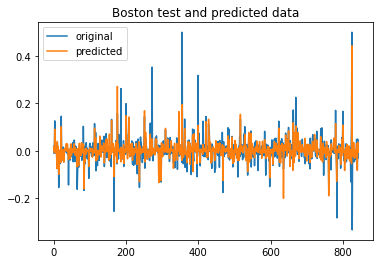

In [66]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

In [67]:
print(cbr.predict(newest_date.iloc[:, :-1]))

[-0.02857891]
